# **DS8015 - Practical Machine Learning for Non Data Scientists**  
## Winter 2024
### Assignment 1 (20% of the final grade)

*****

Consider using a Google Colab platform to complete this assignment. Ensure using **Python 3.9 release or higher**. You are supposed to provide your answers under the <font color='green'>`#WRITE YOUR ANSWER HERE`</font> part in the Code blocks.

Once you complete your answers, you are expected to submit the notebook file (in IPYNB format) in the same Assignment link in D2L.

*****
## **Question 1 [6 pts]**:
  

###**Q1.1 [3 pts]**  
Write code to reverse an integer number entered by the user, and to give the square root of the reversed number. For example, if the user enters `144`, the output should be `441` and `21.0` (output on separate lines).  

**Note that** the program should not use the `[::-1]` method to reverse a number or string.

In [ ]:
#INSERT YOUR ANSWER HERE

# Get input from the user
user_input = int(input("Enter an integer: "))

# Reverse the integer
reversed_number = 0
temp_number = user_input
while temp_number > 0:
    digit = temp_number % 10
    reversed_number = reversed_number * 10 + digit
    temp_number = temp_number // 10

# Calculate the square root of the reversed number
sqrt_result = reversed_number ** 0.5

# Display the results
print("Reversed number:", reversed_number)
print("Square root of the reversed number:", sqrt_result)

Enter an integer: 144
Reversed number: 441
Square root of the reversed number: 21.0


###**Q1.1 [3 pts]**  
There exists a property called **Reversible Square Root** for certain numbers. These numbers are such that when you square them, then reverse the resulting digits, take the square root of that number and reverse the digits again, the result is the same as the original number.

  
For example, the number 12 is a Reversible Square Root number because if you square it ($12^{2}$=144), reverse the digits of the result (which gives 441), take the square root of 441 (which is $\sqrt{441}$=21), and reverse the digits again, you get 12.


Write a program to find all the Reversible Square Root numbers between 1 and 5000, inclusively. The program should display these numbers on the same line, separated by a comma. The last number should not have a comma following it.

**Note that** the program should not use the `[::-1]` method to reverse a number or string.

In [ ]:
#INSERT YOUR ANSWER HERE
def reverse_number(number):
    reversed_number = 0
    while number > 0:
        digit = number % 10
        reversed_number = reversed_number * 10 + digit
        number = number // 10
    return reversed_number

def reversible_square_root(integer):
    # Square the number
    squared_integer = integer ** 2
    # Reverse the squared number
    reversed_squared = reverse_number(squared_integer)
    # Square root the reversed squared number
    sqrt_of_reversed_squared = reversed_squared ** 0.5
    # Reverse the square root number
    reversed_sqrt_of_reversed_squared = reverse_number(int(sqrt_of_reversed_squared))

    # Check if the reversed square root is equal to the original number
    if reversed_sqrt_of_reversed_squared == integer:
        return integer

# Find and display Reversible Square Root numbers between 1 and 5000
reversible_numbers = []

for num in range(1, 5001):
    result = reversible_square_root(num)
    if result is not None:
        reversible_numbers.append(result)

result_str = ", ".join(map(str, reversible_numbers))
print(result_str)

1, 2, 3, 11, 12, 13, 21, 22, 31, 101, 102, 103, 111, 112, 113, 121, 122, 201, 202, 211, 212, 221, 301, 311, 1001, 1002, 1003, 1011, 1012, 1013, 1021, 1022, 1031, 1101, 1102, 1103, 1111, 1112, 1113, 1121, 1122, 1201, 1202, 1211, 1212, 1301, 2001, 2002, 2011, 2012, 2021, 2022, 2101, 2102, 2111, 2121, 2201, 2202, 2211, 3001, 3011, 3101, 3111


*****  
##**Q2 [8 pts]**  


The data file (`supermarket_sales.csv`) used in this question is downloaded from (https://www.kaggle.com/aungpyaeap/supermarket-sales). Please download the csv file from the assignment attachment because it contains some modifications done on the original file. The file is a delimited text file containing the historical record of sales data in three supermarkets. The file contains the following columns separated by the comma character `,`  

* Invoice id: Computer generated sales slip invoice identification number  
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


###**Q2.1 [2 pts]**  
Write a Python function that reads the Supermarket Sales data into a 2-dimensional structure and returns the read information to the calling program.  
**Note**: The first line of the CSV contains the column headings, therefore it should not be stored in the 2-dimensional data structure. You can skip the first line of the file.


In [1]:
# WRITE YOUR SOLUTION HERE
import pandas as pd

def read_supermarket_sales(file_path):
    # Read the CSV file into a Pandas DataFrame
    data = pd.read_csv(file_path)
    return data

###**Q2.2 [2 pts]**  
Write a function to receive the Supermarket Sales structure (that 2-dimensional structure you’ve created in the previous question) and returns the total gross income (the sum of column `Gross Income`) of the branches **as a dictionary**

E.g. The returned information should look like (the numbers given below may not be correct):  
`{"A": 123456.123, "B": 234567.567, "C": 345678.9987}`

In [3]:
import pandas as pd

def calculate_gross_income_by_branch(file_path):
    # Grouping by 'Branch' and summing up 'Gross Income'
    branch_income = file_path.groupby('Branch')['gross income'].sum()

    # Converting the Series to a dictionary
    income_dict = branch_income.to_dict()

    return income_dict

###**Q2.3 [2 pts]**  
Write a function to receive the Supermarket Sales list and returns an object (may be a list, or a dictionary) containing the total number of sales per Branch and per Customer Types.

The returned information can be either one of the below choices (or other)
* a dictionary like `{"A": {"Member": 230, "Normal": 351}, "B": {"Member": 123, "Normal": 117},  "C": {"Member": 335, "Normal": 18}}`
* a list like `[ [230, 351], [123, 117], [335, 18]]`

You need to consider the best structure to return since you will be displaying this information in a human readable format in the following question.

In [4]:
# WRITE YOUR SOLUTION HERE
import pandas as pd

def count_sales_by_branch_and_customer_type(file_path):
    # Grouping by 'Branch' and 'Customer type' and counting the sales
    count_data = file_path.groupby(['Branch', 'Customer type']).size()

    # Preparing the nested dictionary structure
    sales_count = {}
    for (branch, customer_type), count in count_data.items():
        if branch not in sales_count:
            sales_count[branch] = {}
        sales_count[branch][customer_type] = count

    return sales_count

###**Q2.4 [2 pts]**  
Write a Python program to execute the following tasks:
* Call the function you wrote in Q2.1 to read the data file
* Call the function you wrote in Q2.2 to calculate the total gross income information and displays the information on the screen
* Call the function you wrote in Q2.3 to calculate the total number of sales per Brannch and per Customer Types and displays the information on the screen

**Note**: While displaying the information on the screen the outputs should be human readable and understandable (e.g. column headings, row names)

In [13]:
# WRITE YOUR SOLUTION HERE
file_path = 'supermarket_sales.csv'

# Call the function from 2.1
sales_data = read_supermarket_sales(file_path)
#Display the first 5 rows of the 2D array
print("Q2.1:\n",sales_data.head().to_string())

# Call the function from 2.2
print("\nQ2.2:\n", calculate_gross_income_by_branch(sales_data))

# Call the function from 2.3
print("\nQ2.3:\n",count_sales_by_branch_and_customer_type(sales_data))

Q2.1:
     Invoice ID Branch       City Customer type  Gender            Product line  Unit price  Quantity   Tax 5%     Total       Date   Time      Payment    cogs  gross margin percentage  gross income  Rating
0  750-67-8428      A     Yangon        Member  Female       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet  522.83                 4.761905       26.1415     9.1
1  226-31-3081      C  Naypyitaw        Normal  Female  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019  10:29         Cash   76.40                 4.761905        3.8200     9.6
2  631-41-3108      A     Yangon        Normal    Male      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card  324.31                 4.761905       16.2155     7.4
3  123-19-1176      A     Yangon        Member    Male       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet  465.76           

*****  
##**Q3 [6 pts]**  


The data files (`Orders.csv` and `Details.csv`) used in this question is downloaded from https://www.kaggle.com/datasets/samruddhi4040/online-sales-data?select=Orders.csv.  
  
Please download the csv file from the D2L assignment page.  
The column headers on the data files are self descriptive. The common field between two data files is the `Order Id` that can be used to associate the different information rows given in both data files.

###**Q3.1 [2 pts]**  
Write a Python program that will:  
* Read the csv files and store them in Pandas datasets  
* Merge the 2 Pandas Datasets into a 3rd Pandas dataset using the `Order ID` so that related records are merged on the same rows of the newly created dataset  
* Display the first 5 rows of the merged dataset

In [16]:
# WRITE YOUR SOLUTION HERE
import pandas as pd

# Read the csv files into Pandas datasets
orders_df = pd.read_csv('Orders.csv')
details_df = pd.read_csv('Details.csv')

# Merge the datasets using the Order ID
merged_df = pd.merge(orders_df, details_df, on='Order ID')

# Display the first 5 rows of the merged dataset
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD


###**Q3.2 [2 pts]**  
Write a Python code that will display the bar graph of the Category total counts of the merged dataset


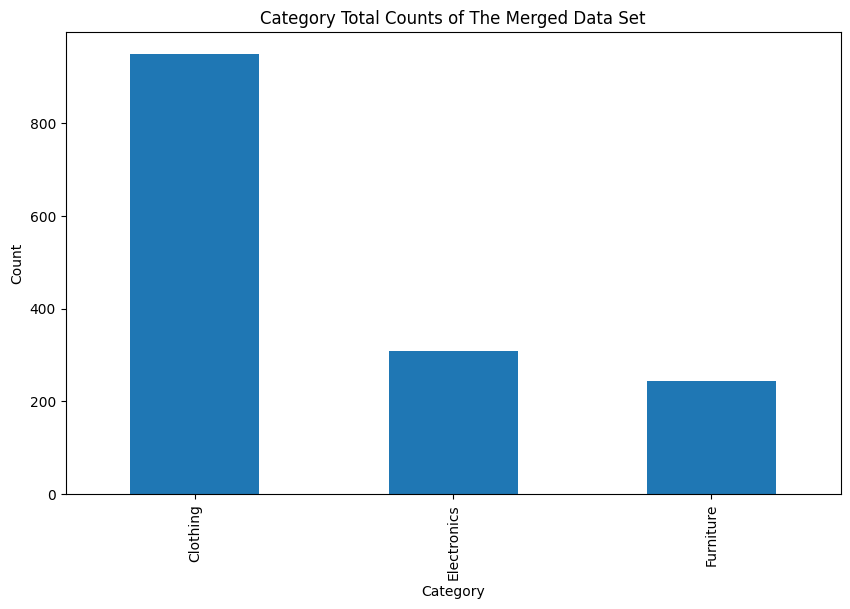

In [19]:
# WRITE YOUR SOLUTION HERE
import matplotlib.pyplot as plt

# Calculate Category total counts
category_counts = merged_df['Category'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Category Total Counts of The Merged Data Set')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

###**Q3.3 [2 pts]**  
Write a Python code that will display the line graph of the total amounts for each year and months of the merged dataset where each category will be displayed as a separate line


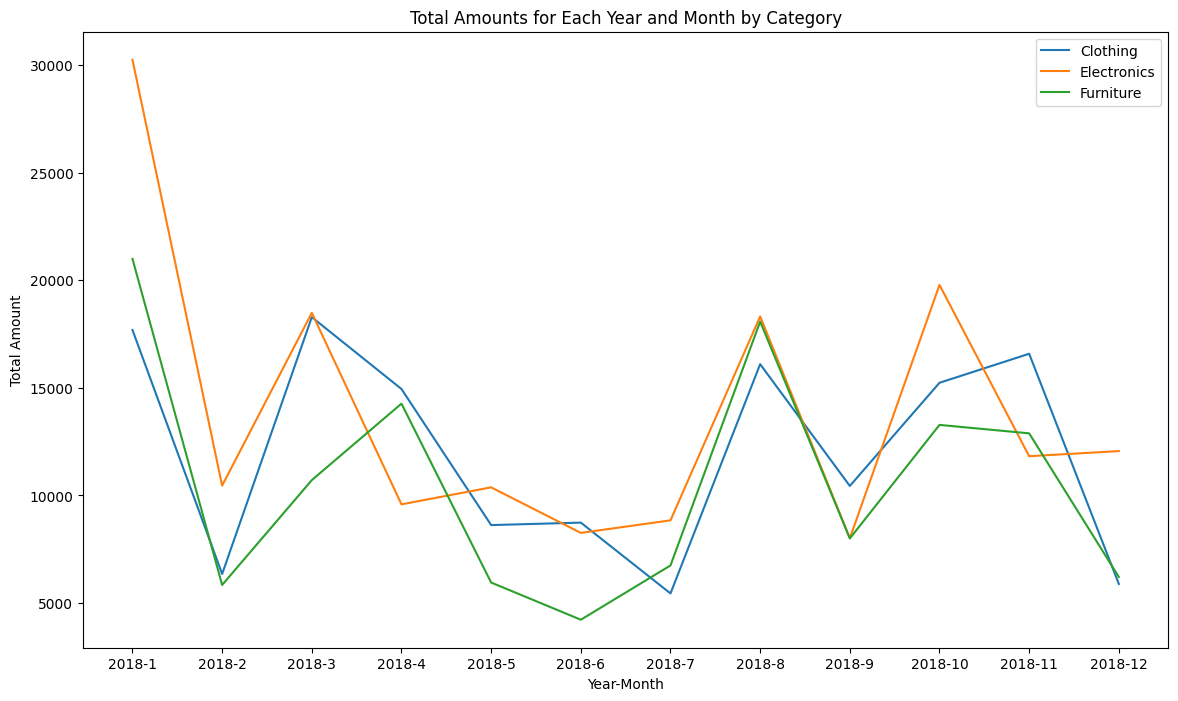

In [22]:
# WRITE YOUR SOLUTION HERE

# Convert the 'Order Date' column to datetime format
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])

# Extract Year and Month from the 'Order Date' column
merged_df['Year'] = merged_df['Order Date'].dt.year
merged_df['Month'] = merged_df['Order Date'].dt.month

# Group by Year, Month, and Category, and calculate the total amount
grouped_df = merged_df.groupby(['Year', 'Month', 'Category'])['Amount'].sum().reset_index()

# Create a line graph for each category
plt.figure(figsize=(14, 8))

categories = grouped_df['Category'].unique()
for category in categories:
    category_data = grouped_df[grouped_df['Category'] == category]
    plt.plot(category_data['Year'].astype(str) + '-' + category_data['Month'].astype(str), category_data['Amount'], label=category)

plt.title('Total Amounts for Each Year and Month by Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
